# Проект: Анализ оттока клиентов банка

**Описание проекта**: В банке повысился отток клиентов, необходимо принять меры. Ранее в банке уже проводили исследование оттока клиентов, но клиентская база поменялась и прошлые решения не оказывают эффекта. Нужно провести новое исследование, результаты которого помогут снизить отток клиентов.

**Цель**: Выделить сегменты клиентов, склонных уходить из банка; дать рекомендации по снижению оттока

**Описание данных**:

- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `Age` — возраст,
- `equity`  — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — заработная плата клиента,
- `churn` — ушёл или нет.

**Задачи**:
1. Обзор и подготовка данных:
* Подключение нужных библиотек, загрузка датасета
* Изучение общей информации (соответствие типов данных, анализ пропусков, дубликатов)
* Изучение ошибок и аномалий
* Подготовка данных (замена типов данных, удаление дубликатов, кодирование категориальных признаков)
2. Исследовательский анализ данных:
* Визуализация и анализ распределения признаков
* Анализ портретов клиентов в разрезе оттока
* Корреляционный анализ факта оттока с другими признаками
3. Проверка статистических гипотез
* Определение нулевой и альтернативной гипотезы
* Обоснование выбора статистического теста
* Проверка статистической значимости
4. Промежуточные выводы
* Выводы по результатам исследовательского анализа данных, проверенных гипотез
* Определение признаков, влияющих на отток
* Определение интервалов, включающих наибольший процент оттока клиентов
5. Сегментация клиентов
* Выделение сегментов на основе признаков, влияющих на отток и интервалов с наибольшим оттоком клиентов
* Приоритезация сегментов клиентов
6. Выводы и рекомендации
* Выводы, полученные в ходе работы
* Рекомендации по снижению оттока клиентов
7. Подготовка презентации и дашборда
* Презентация в формате pdf
* Ссылка на дашборд в tableau

**Материалы:**

[Презентация](https://drive.google.com/file/d/1GDJ0Tjb8AXrfS_RZxJk4q0VRiN83vp_m/view?usp=share_link)

[Дашборд](https://public.tableau.com/app/profile/anastasia.mayorova/viz/Bank_16819791262390/Dashboard1)

## Обзор и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')
sns.set_palette('tab10', n_colors=10)
pd.options.display.float_format ='{:,.3f}'.format

In [2]:
!gdown --id 1LYbLGzeIhd3AZQcQ30ukjjlO4eE45rEx
# загрузка датасета
df = pd.read_csv('bank_scrooge.csv', sep=',')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1LYbLGzeIhd3AZQcQ30ukjjlO4eE45rEx
To: /content/bank_scrooge.csv
100% 666k/666k [00:00<00:00, 6.69MB/s]


In [3]:
# функция для обзора данных
def data_info(data):
    data.columns = data.columns.str.lower()
    display(data.head())
    display(data.info())
    display(data.describe(include='all'))
    print(f'Количество дубликатов: {data.duplicated().sum()}')
    print(f'Количество пропусков: \n{data.isna().sum()}')

In [4]:
data_info(df)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.000,Рыбинск,Ж,25.000,1,"59,214.820",2,0,1,"75,719.140",1
1,146556,861.000,Рыбинск,Ж,37.000,5,"850,594.330",3,1,0,"86,621.770",0
2,120722,892.000,Рыбинск,Ж,30.000,0,NaN,1,1,1,"107,683.340",0
3,225363,866.000,Ярославль,Ж,51.000,5,"1,524,746.260",2,0,1,"174,423.530",1
4,157978,730.000,Ярославль,М,34.000,5,174.000,1,1,0,"67,353.160",1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"10,000.000","10,000.000",10000,10000,"9,974.000","10,000.000","7,705.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000"
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ярославль,М,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5888,5005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,"171,814.713",848.699,NaN,NaN,42.734,2.628,"827,794.307",1.870,0.680,0.523,"147,866.886",0.182
std,"33,708.238",65.449,NaN,NaN,12.180,1.981,"1,980,614.147",0.793,0.466,0.499,"139,388.511",0.386
min,"94,561.000",642.000,NaN,NaN,18.000,0.000,0.000,0.000,0.000,0.000,"2,546.300",0.000
25%,"142,810.250",802.000,NaN,NaN,33.000,0.000,"295,554.160",1.000,0.000,0.000,"75,251.900",0.000
50%,"172,728.000",853.000,NaN,NaN,40.000,3.000,"524,272.200",2.000,1.000,1.000,"119,658.105",0.000
75%,"201,261.750",900.000,NaN,NaN,51.000,4.000,"980,705.850",2.000,1.000,1.000,"174,500.542",0.000


Количество дубликатов: 0
Количество пропусков: 
userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64


In [5]:
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

Банк представлен в 3 городах, ошибок не обнаружено. Посмотрим на строки, где количество продуктов равно 0, ведь у клиента банка должен быть хотя бы один продукт

In [6]:
df[df['products'] == 0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.000,Рыбинск,Ж,79.000,3,NaN,0,0,0,"25,063.960",1


Такой клиент всего один. Вероятно, прежде, чем покинуть банк, клиент отказался от всех продуктов. Удалим эту строку, так как необходимо исследовать отток среди действительных клиентов банка

In [ ]:
df = df.drop(index=8957)

В датасете 10000 строк. Банк представлен в трех городах: Рыбинск, Ярославль, Ростов. Возраст клиентов от 18 до 80 лет. В остальных столбцах ошибок также не обнаружено. Закодируем признаки города и пола для дальнейшего выявления корреляции с фактом оттока. Присутствуют пропуски в двух колонках: возраст (совсем незначительное количество пропусков) и баланс (пропусков около 23%, нужно посмотреть подробнее). Явные дубликаты не обнаружены, нужно проверить на неявные дубликаты

Заменим типы данных столбцов возраст и баллы скоринга, заменим пропущенные значения в столбце возраста

Посмотрим на пропуски в колонке баланса, исследуем средние значения признаков с пропусками в балансе и без

In [ ]:
df1 = df[df['balance'].isna()]
df1.head(20)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.000,Рыбинск,Ж,30.000,0,NaN,1,1,1,"107,683.340",0
9,133130,906.000,Ярославль,Ж,67.000,0,NaN,1,0,1,"238,055.530",0
10,148929,927.000,Ростов,М,52.000,0,NaN,1,1,1,"196,820.070",0
11,172184,921.000,Ростов,М,41.000,0,NaN,1,1,1,"217,469.480",0
19,127034,922.000,Рыбинск,Ж,53.000,0,NaN,1,0,0,"147,094.820",0
21,177415,896.000,Рыбинск,Ж,47.000,0,NaN,1,0,0,"225,060.350",0
30,155730,946.000,Ярославль,Ж,47.000,0,NaN,2,1,1,"660,015.850",0
34,205226,944.000,Ярославль,М,35.000,0,NaN,2,1,1,"239,843.390",0
39,173175,924.000,Рыбинск,Ж,51.000,0,NaN,1,1,1,"248,844.470",0
43,228585,956.000,Ростов,М,41.000,0,NaN,1,1,0,"115,117.100",0


In [ ]:
df.mean()

userid          171,817.111
score               848.688
age                  42.731
equity                2.628
balance         827,794.307
products              1.870
credit_card           0.680
last_activity         0.524
est_salary      147,879.167
churn                 0.182
dtype: float64

In [ ]:
df1.mean()

userid          172,080.011
score               865.310
age                  42.077
equity                0.050
balance                 NaN
products              1.163
credit_card           0.816
last_activity         0.550
est_salary      226,397.936
churn                 0.005
dtype: float64

In [ ]:
df1['churn'].value_counts()

0    2282
1      12
Name: churn, dtype: int64

In [ ]:
df1['city'].value_counts()

Ярославль    1467
Рыбинск       592
Ростов        235
Name: city, dtype: int64

Никаких особенностей и закономерностей не видно, средние значения отличаются только по зарплате. Возможно, возникла техническая ошибка при выгрузке данных, или баланс отображается только при наличии дебетового счета в банке, так как конкретные продукты, которые ипользуют клиенты нам не известны. Замена на какие-либо значения (медиана, среднее) повлечет за собой искажение данных, оставим пропуски, это не основной показатель, на который нужно полагаться при исследовании оттока клиентов.

Проверим неявные дубликаты

In [ ]:
df[df['userid'].duplicated(keep=False)].sort_values(by='userid')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.000,Рыбинск,Ж,55.000,1,"362,756.490",3,0,1,"175,920.480",1
7694,116540,887.000,Ярославль,Ж,38.000,0,NaN,1,0,1,"119,247.610",0
7542,117943,880.000,Ярославль,Ж,40.000,0,NaN,1,1,0,"137,718.930",0
4866,117943,855.000,Рыбинск,Ж,32.000,6,"1,036,832.930",4,1,1,"107,792.710",1
5896,120258,905.000,Ярославль,М,30.000,0,NaN,1,1,1,"146,427.960",0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990.000,Ярославль,М,37.000,4,"14,648,692.140",2,0,0,"934,412.610",1
8205,227795,840.000,Рыбинск,М,34.000,2,"350,768.030",1,1,0,"102,036.140",1
8497,227795,839.000,Ярославль,М,34.000,2,"326,593.140",2,1,0,"103,314.920",0
6457,228075,839.000,Рыбинск,М,39.000,5,"507,199.850",3,0,1,"85,195.800",0


Нашли 73 дубликата ID клиентов, каждый из которых повторяется два раза. Скорее всего, это произошло из-за неправильного слияния данных из разных таблиц. Видно, что клиенты разные, у них отличаются и город, и возраст, и заработная плата, удалять эти строки не будем, просто переиндексируем таблицу.

In [ ]:
df = df.set_index('userid').reset_index(drop=True)

Создадим копии столбцов, чтобы не потерять исходные данные, и закодируем признак города и пола, создав новые колонки, 1 будет означать принадлежность к каждому городу/полу

In [ ]:
df['city_'] = df['city'].copy()
df['gender_'] = df['gender'].copy()
df = pd.get_dummies(df, columns=['city_', 'gender_'])
df = df.rename(columns={'city__Ростов':'Ростов',
                               'city__Рыбинск': 'Рыбинск',
                               'city__Ярославль': 'Ярославль',
                               'gender__Ж': 'Ж',
                               'gender__М': 'М'})

In [ ]:
df.head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,Ж,М
0,850.000,Рыбинск,Ж,25.000,1,"59,214.820",2,0,1,"75,719.140",1,0,1,0,1,0
1,861.000,Рыбинск,Ж,37.000,5,"850,594.330",3,1,0,"86,621.770",0,0,1,0,1,0
2,892.000,Рыбинск,Ж,30.000,0,NaN,1,1,1,"107,683.340",0,0,1,0,1,0
3,866.000,Ярославль,Ж,51.000,5,"1,524,746.260",2,0,1,"174,423.530",1,0,0,1,1,0
4,730.000,Ярославль,М,34.000,5,174.000,1,1,0,"67,353.160",1,0,0,1,0,1


В датасете 10000 строк, банк представлен в трех городах: Рыбинск, Ярославль, Ростов. Возраст клиентов от 18 до 80 лет. Были найдены дубликаты ID клиентов, но дублирующие строки были сохранены, так как данные клиентов разные, похоже на ошибку при слиянии данных из разных таблиц. Привели названия колонок к единому стилю. Есть несколько пропусков в колонке возраста, а также около 23% в колонке баланса на счете. Пропуски оставили, так как замена на среднее/медиану повлечет за собой искажение данных. Для определения корреляции между признаками, провели кодирование признаков города и пола

## Исследовательский анализ данных

Для каждой категориальной переменной построим столбчатые диаграммы, посмотрим количество клиентов по городам, полу, количеству используемых продуктов, количеству баллов собственности, имеющих кредитные карты, попавших в отток и активных клиентов. А также посмотрим на эти признаки в разрезе оттока

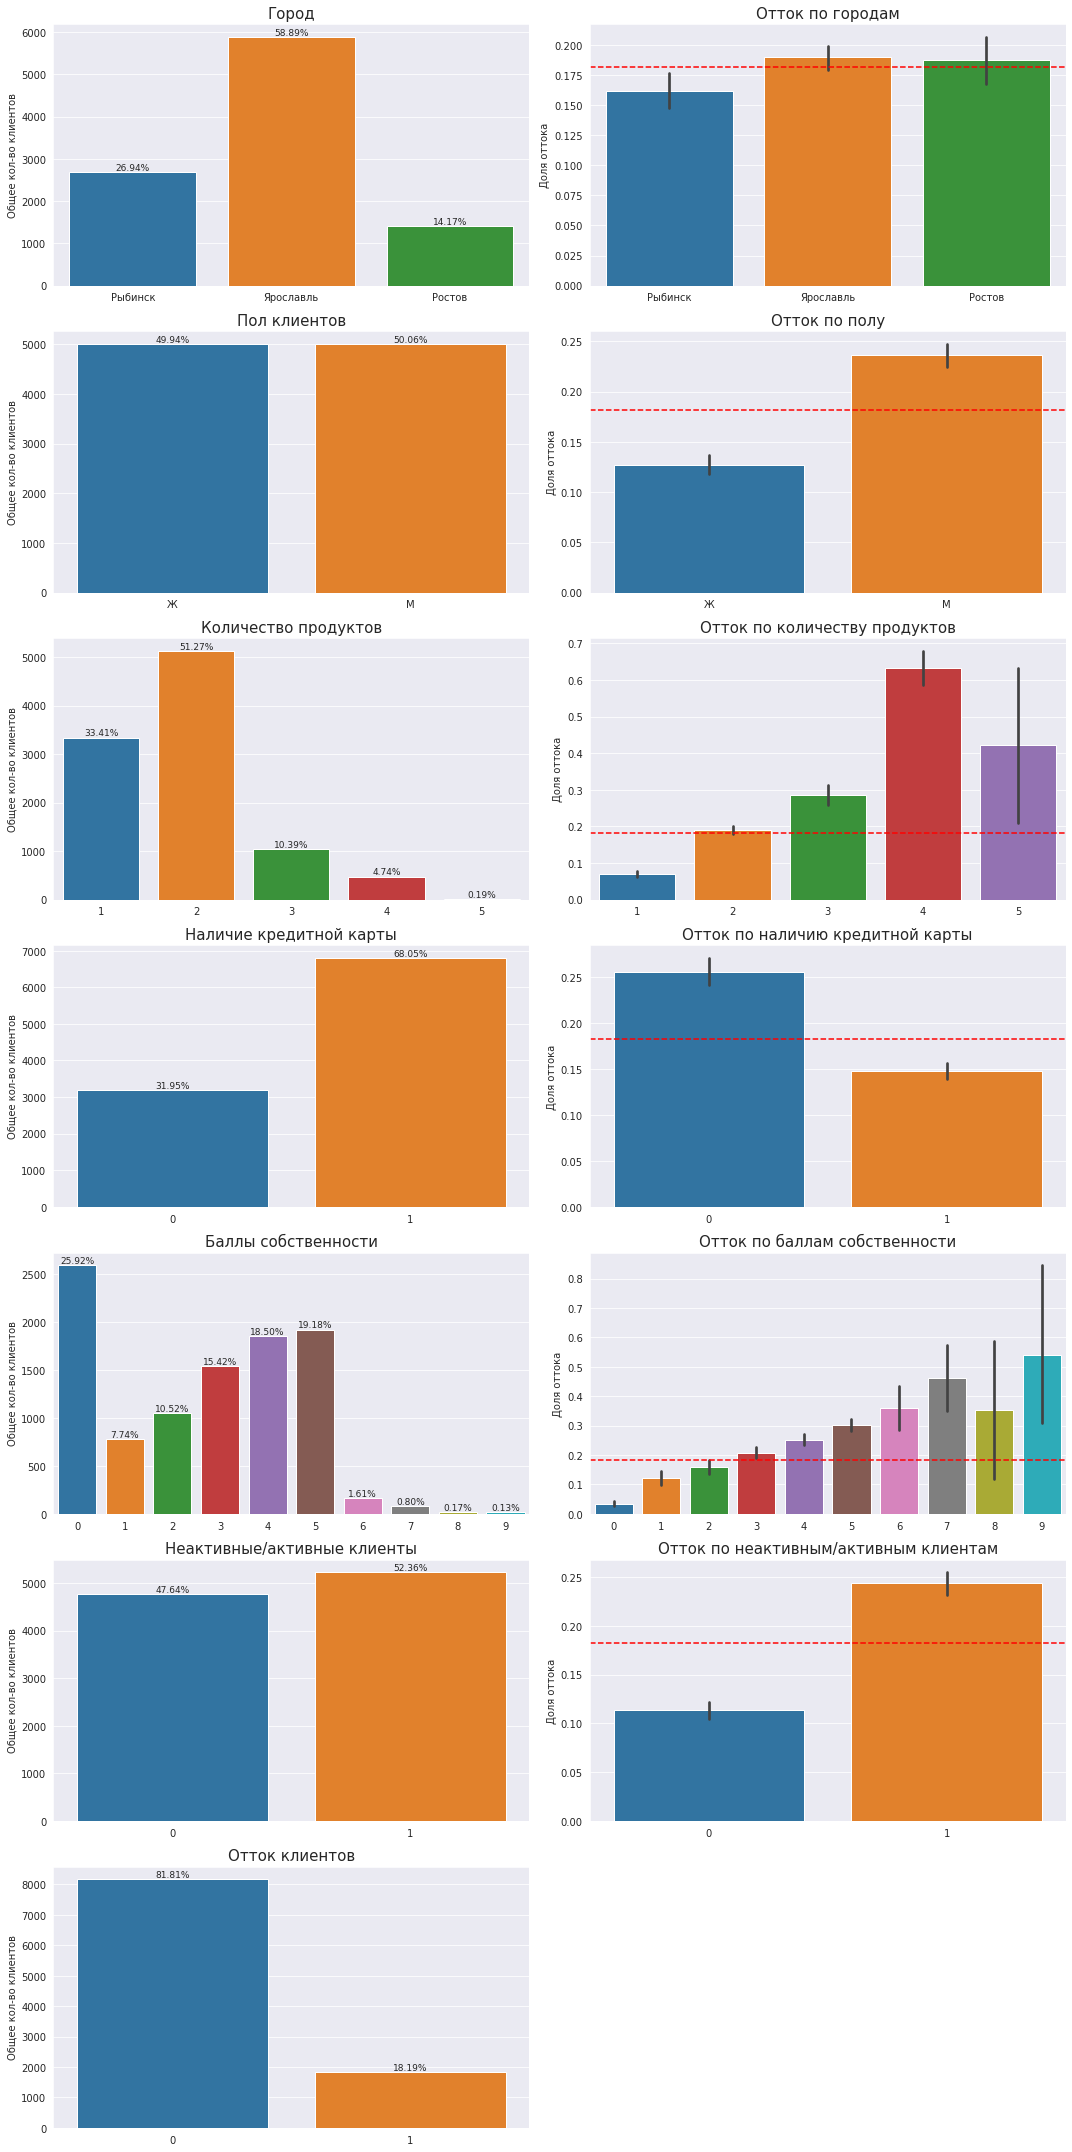

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))

columns = ['city', 'gender', 'products', 'credit_card', 'equity', 'last_activity', 'churn']
title1 = {
    'city': 'Город',
    'gender': 'Пол клиентов',
    'products': 'Количество продуктов',
    'equity': 'Баллы собственности',
    'credit_card': 'Наличие кредитной карты',
    'last_activity': 'Неактивные/активные клиенты',
    'churn': 'Отток клиентов'}
title2 = {
    'city': 'Отток по городам',
    'gender': 'Отток по полу',
    'products': 'Отток по количеству продуктов',
    'equity': 'Отток по баллам собственности',
    'credit_card': 'Отток по наличию кредитной карты',
    'last_activity': 'Отток по неактивным/активным клиентам',
    'churn': 'Отток клиентов'}

# список осей
ax2_list = []

# для каждой колонки строим countplot и barplot
for i, col in enumerate(columns):

    ax1 = sns.countplot(x=col, data=df, ax=axes[i][0])
    ax1.set_ylabel('Общее кол-во клиентов')
    ax1.set_title(title1[col], fontsize=15)
    ax1.set(xlabel=None)

    # настраиваем отображение процентов
    for p in ax1.patches:
        cnt = p.get_height()
        ax1.annotate(f'{cnt / len(df[col]) * 100:.2f}%',
                     xy=(p.get_x() + p.get_width() / 2, cnt),
                     ha='center',
                     va='bottom',
                     fontsize=9)

    # barplot по оттоку, устанавливаем линию со средним уровнем оттока
    ax2 = sns.barplot(x=col, y='churn', data=df, ax=axes[i][1])

    # добавление линии со средним уровнем оттока
    mean_churn = df['churn'].mean()
    ax2.axhline(mean_churn, color='red', linestyle='--', label='Средний отток')
    ax2.set_ylabel('Доля оттока')
    ax2.set_title(title2[col], fontsize=15)
    ax2.set(xlabel=None)
    ax2_list.append(ax2)

# удаляем график оттока с разбивкой по оттоку в последней ячейке
axes[-1][1].remove()

plt.tight_layout()
plt.show()

Клиентская база банка:
* Большинство клиентов из Ярославля
* Соотношение мужчин и женщин примерно одинаковое
* В основном, клиенты пользуются двумя и одним продуктом
* У большинства клиентов до 5 баллов собственности
* 68% клиентов оформили кредитную карту
* 52% активных клиентов
* Отток составляет 18%

Клиенты попавшие в отток:
* Доля оттока в Ярославле и Ростове превышает средний уровень оттока
* Большинство ушедших клиентов - мужчины
* Начиная от 2 продуктов отток клиентов превышает средний уровень оттока (доля клиентов с 5-ю продуктами слишком мала, чтобы принимать во внимание превышение среднего уровня оттока на графике)
* Отток среди клиентов, у которых нет кредитной карты превышает средний уровень оттока
* Доля оттока у клиентов с 3, 4, 5-ю баллами собственности превышает средний уровень оттока (доля клиентов с 6, 7, 8, 9-ю баллами слишком мала, чтобы принимать во внимание превышение среднего уровня оттока на графике)
* Доля оттока среди активных клиентов превышает средний уровень оттока

Рассмотрим распределение непрерывных переменных с настройками, позволяющими нормализовать каждую гистограмму в независимости друг от друга.

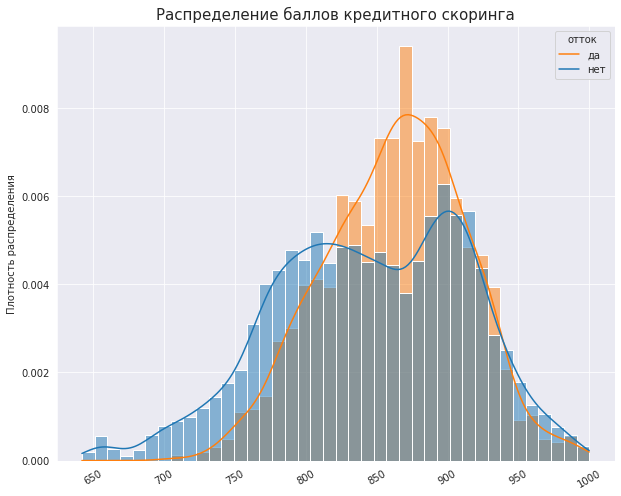

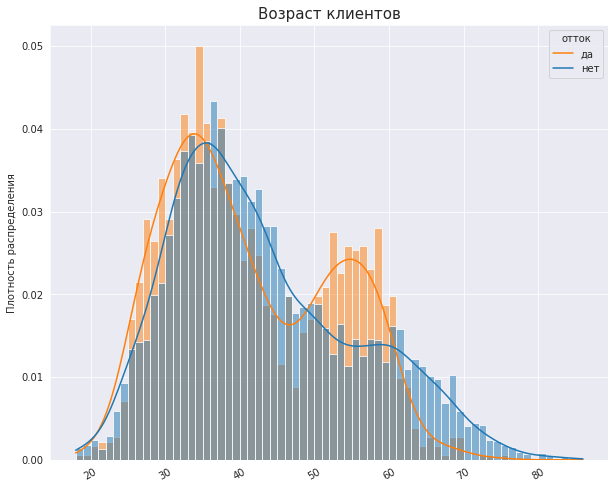

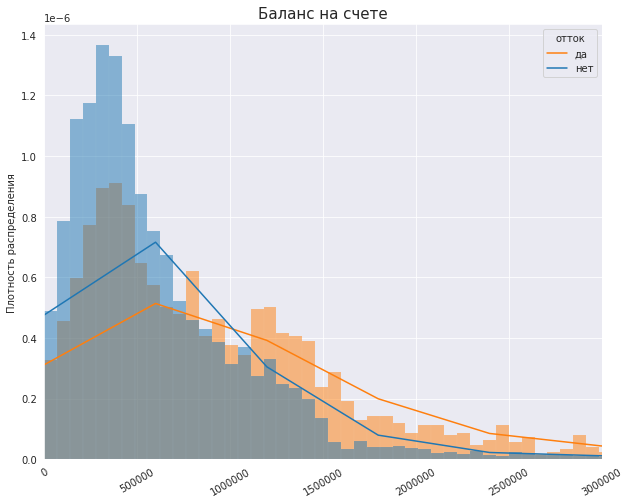

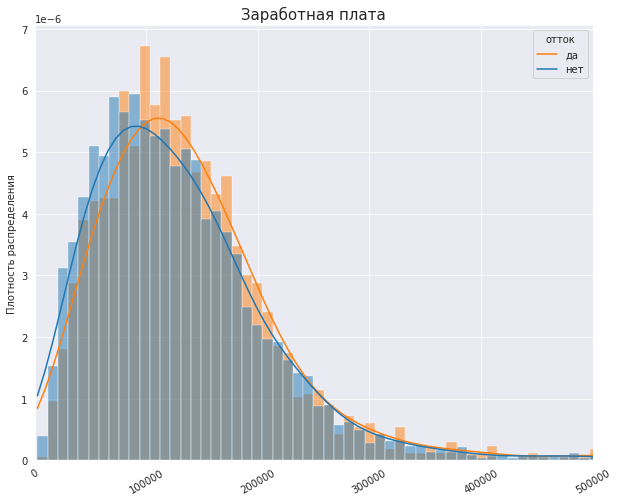

In [ ]:
# функция для построения гистограммы
def histplot(df, column, title, x=None, x1=None, binwidth=None):
    plt.figure(figsize=(10, 8))
    sns.histplot(data=df, x=column, kde=True, stat="density", common_norm=False, hue='churn', binwidth=binwidth)
    ax = plt.gca()
    ax.set(xlabel=None)
    ax.ticklabel_format(style='plain', axis='x')
    ax.legend(title='отток', labels=['да', 'нет'], loc='upper right')
    plt.xticks(rotation=30)
    plt.ylabel('Плотность распределения')
    plt.title(title, fontsize=15)
    plt.xlim(x, x1)

columns = ['score', 'age', 'balance', 'est_salary']
titles = {
    'score': 'Распределение баллов кредитного скоринга',
    'age': 'Возраст клиентов',
    'balance': 'Баланс на счете',
    'est_salary': 'Заработная плата'}

# для каждой колонки с непрерывной переменной отображаем график, ограничивая ось x
for column in columns:
    if column == 'balance':
        x = 0
        x1 = 3000000
    elif column == 'est_salary':
        x = 0
        x1 = 500000
    else:
        x = None
        x1 = None

    if column == 'age':
        histplot(df, df[column], title=titles[column], x=x, x1=x1, binwidth=1)
    else:
        histplot(df, df[column], title=titles[column], x=x, x1=x1)

В отток чаще попадают клиенты с большим количеством баллов, в возрасте от 26 до 38, и от 51 до 61, с балансом на счете выше, чем у всех клиентов. Заработная плата клиентов из оттока немного смещена правее относительно всех клиентов, то есть заработная плата у них чуть выше, основной отток приходится на клиентов с зарплатой ~ 90000-210000.

Определим границы интервала с большим количеством оттоковых клиентов по баллам кредитного скоринга, отбросив края распределения, примерно 10 и 90 квантиль

In [ ]:
print('Границы интервала баллов кредитного скоринга с наибольшим оттоком')
print(f'''Левая граница: {df[df['churn'] == 1]['score'].quantile(0.1)}''')
print(f'''Правая граница: {df[df['churn'] == 1]['score'].quantile(0.9)}''')

Границы интервала баллов кредитного скоринга с наибольшим оттоком
Левая граница: 796.0
Правая граница: 926.0


Посмотрим на средние значения признаков в разрезе оттока, посчитаем относительную разницу между ними

In [ ]:
churn = df.groupby('churn').agg('mean').T
churn = churn.rename(columns={0: 'не отток', 1: 'отток'})
churn['Относительная разница'] = abs(churn['отток'] - churn['не отток'])/churn['отток'] * 100
churn

churn,не отток,отток,Относительная разница
score,845.428,863.347,2.075
age,43.021,41.430,3.841
equity,2.375,3.764,36.910
balance,"733,982.586","1,133,993.271",35.275
products,1.758,2.377,26.063
credit_card,0.709,0.551,28.612
last_activity,0.484,0.703,31.148
est_salary,"147,783.200","148,310.728",0.356
Ростов,0.141,0.146,3.778
Рыбинск,0.276,0.240,15.164


В группе оттока преобладают мужчины - 65% против 35% женщин. Более 60% отточных клиентов были зарегистрированы в филиале Ярославля. Активные клиенты более склонны к оттоку. Остальные показатели схожи.

Проверим корреляцию оттока с остальными признаками

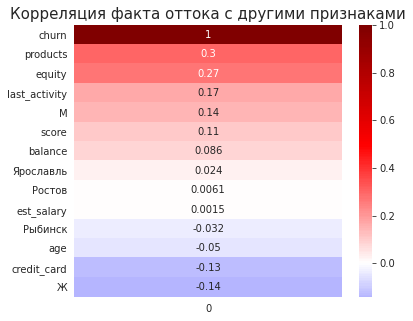

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(df.corrwith(df['churn']).sort_values(ascending=False).to_frame(), annot=True, cmap='seismic', center=0)
plt.title('Корреляция факта оттока с другими признаками', fontsize=15);

В целом, в соответствии со шкалой корреляции Чеддока, по всем признакам наблюдается слабая корреляция. Наибольшая корреляция оттока наблюдается с количеством используемых продуктов (0.3) и количеством баллов собственности (0.27).

## Проверка статистических гипотез

Определим статистический тест для проверки гипотезы о различии дохода между теми клиентами, которые ушли и теми, которые остались. Необходимо проверить равенство средних двух выборок. На графиках видели, что распределение не похоже на нормальное, чтобы убедиться в этом, проведем тест Шапиро-Уилка

Нулевая: данные распределены нормально

Альтернативная: данные распределены не нормально

Для всех тестов установим уровень значимости (alpha) = 0.05

In [ ]:
# определим выборки
salary_churn = df[df['churn'] == 1]['est_salary']
salary_no_churn = df[df['churn'] == 0]['est_salary']
# функция для определения нормальности распределения
def norm(sample):
    alpha = 0.05
    results = st.shapiro(sample)
    print(results.pvalue)
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу, данные распределены не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, данные распределены нормально')

In [ ]:
norm(salary_churn)

0.0
Отвергаем нулевую гипотезу, данные распределены не нормально


In [ ]:
norm(salary_no_churn)

0.0
Отвергаем нулевую гипотезу, данные распределены не нормально


В обеих выборках данные распределены не нормально, значит ttest не подходит. Будем использовать непараметрический тест Уилкоксона-Манна-Уитни

In [ ]:
# функция для теста Манна-Уитни
def test_mnw(a , b):
    alpha = 0.05
    pvalue = st.mannwhitneyu(a, b)[1]
    print(f'p_value: {pvalue}')
    if pvalue < alpha:
        print('Отвергаем нулевую гипотезу, различия между выборками есть')
    else:
        print('Нет оснований отвергнуть нулевую гипотезу, различий между выборками нет')

Сформулируем гипотезы:

Нулевая: Нет разницы между доходом клиентов, которые ушли и теми, которые остались.

Альтернативная: Есть разница между доходом клиентов, которые ушли и теми, которые остались.

In [ ]:
test_mnw(salary_churn, salary_no_churn)

p_value: 0.00021160652203623057
Отвергаем нулевую гипотезу, различия между выборками есть


Тест Манна-Уитни показал, что есть разница между доходом клиентов, которые ушли и теми, которые остались

Проверим гипотезу о разнице в возрасте между клиентами, которые ушли и теми, которые остались, предварительно проверив выборки на нормальность распределения

In [ ]:
# определим выборки
age_churn = df[df['churn'] == 1]['age']
age_no_churn = df[df['churn'] == 0]['age']

In [ ]:
norm(age_churn)

1.0
Не получилось отвергнуть нулевую гипотезу, данные распределены нормально


In [ ]:
norm(age_no_churn)

1.0
Не получилось отвергнуть нулевую гипотезу, данные распределены нормально


Данные распределены не нормально, также будем использовать критерий Манна-Уитни

Сформулируем гипотезы:

Нулевая: Нет разницы в возрасте между клиентами, которые ушли и теми, которые остались.

Альтернативная: Есть разница в возрасте между клиентами, которые ушли и теми, которые остались.

In [ ]:
test_mnw(age_churn, age_no_churn)

p_value: nan
Нет оснований отвергнуть нулевую гипотезу, различий между выборками нет


Тест Манна-Уитни показал, что есть разница в возрасте между клиентами, которые ушли и теми, которые остались

Проверим гипотезу о разнице в баллах кредитного скоринга между клиентами, которые ушли и теми, которые остались, предварительно проверив выборки на нормальность распределения

In [ ]:
# определим выборки
score_churn = df[df['churn'] == 1]['score']
score_no_churn = df[df['churn'] == 0]['score']

In [ ]:
norm(score_churn)

0.00010231484338873997
Отвергаем нулевую гипотезу, данные распределены не нормально


In [ ]:
norm(score_no_churn)

3.817680641163025e-26
Отвергаем нулевую гипотезу, данные распределены не нормально


Данные распределены не нормально, используем критерий Манна-Уитни

Сформулируем гипотезы:

Нулевая: Нет разницы в баллах кредитного скоринга между клиентами, которые ушли и теми, которые остались.

Альтернативная: Есть разница в баллах кредитного скоринга между клиентами, которые ушли и теми, которые остались.

In [ ]:
test_mnw(score_churn, score_no_churn)

p_value: 7.364570509844462e-22
Отвергаем нулевую гипотезу, различия между выборками есть


Тест Манна-Уитни показал, что есть разница в баллах кредитного скоринга между клиентами, которые ушли и теми, которые остались

## Промежуточные выводы

По результатам исследовательского анализа данных определили клиентскую базу банка:
* Большинство клиентов из Ярославля
* Соотношение мужчин и женщин одинаковое
* В основном, клиенты пользуются двумя и одним продуктом
* У большинства клиентов до 5 баллов собственности
* 68% клиентов оформили кредитную карту
* 52% активных клиентов
* Отток составляет 18%

Определили клиентов, которые попали в отток:
* Доля оттока в Ярославле и Ростове превышает средний уровень оттока
* Большинство ушедших клиентов - мужчины (65% против 35% женщин)
* Начиная от 2 продуктов отток клиентов превышает средний уровень оттока
* Отток среди клиентов, у которых нет кредитной карты превышает средний уровень оттока
* Доля оттока у клиентов с 3, 4, 5-ю баллами собственности превышает средний уровень оттока
* Доля оттока среди активных клиентов превышает средний уровень оттока (отток активных составляет 70%)
* Среднее количество баллов кредитного скоринга у клиентов в оттоке - 863, больше, чем у неушедших клиентов (845)
* Средний возраст клиента в оттоке - 41 год
* Средняя зарплата клиентов в оттоке ~ 148000

Корреляционный анализ показал, что по всем признакам наблюдается слабая корреляция. Наибольшая корреляция оттока наблюдается с количеством используемых продуктов (0.3) и количеством баллов собственности (0.27).

Проверили и подтвердили гипотезы о том, что:
* Есть разница между доходом  клиентов, которые ушли и теми, которые остались
* Есть разница в баллах кредитного скоринга между клиентами, которые ушли и теми, которые остались
* Есть разница в возрасте между клиентами, которые ушли и теми, которые остались

При проверке гипотез использовали критерий Манна-Уитни, так как выборки имели ненормальное распределение

Исходя из полученных результатов проведенного исследования, клиентов будем сегментировать на основе признаков и диапазонов:
* возраст - 26-38, 51-61
* баллы кредитного скоринга - 796 - 926
* количество баллов собственности - 3-5
* количество продуктов 2-3
* зарплата - 90000-210000

## Сегментация клиентов

Сегментация пользователей будет происходить путем комбинации выбранных параметров:
* пол
* возраст
* баллы кредитного скоринга
* количество баллов собственности
* количество продуктов
* зарплата

Будем рассматривать сегменты по полу и возрасту и одному из выделенных признаков. Таким образом, сможем избежать пересечения пользователей в разных сегментах и охватить большее количество пользователей в сегменте. Приоритизация будет происходить путем выбора сегмента в каждой группе пол-возраст, где выбранный признак охватит наибольшую долю оттока и большее количество клиентов в сегменте

In [ ]:
# функция, подсчитывающая количество клиентов и долю оттока в каждом сегменте
def segment(gender, x, y, param, p1, p2):
    sgm = df.query('gender == @gender and @x < age <= @y and @p1 <=' + param + '<= @p2')
    print (f'Размер сегмента: {sgm["score"].count()}')

    print (f'Кол-во ушедших клиентов: {sgm[sgm["churn"]==1]["score"].count()}')

    print (f'Доля оттока: {round(sgm[sgm["churn"]==1]["score"].count() / sgm["score"].count()*100, 1)}')

Сегменты возраста 26-38, мужской пол

In [ ]:
segment('М', 26, 38, 'products', 1, 2)

Размер сегмента: 1882
Кол-во ушедших клиентов: 382
Доля оттока: 20.3


In [ ]:
segment('М', 26, 38, 'est_salary', 90000, 210000)

Размер сегмента: 1146
Кол-во ушедших клиентов: 302
Доля оттока: 26.4


In [ ]:
segment('М', 26, 38, 'equity', 3, 5)

Размер сегмента: 1136
Кол-во ушедших клиентов: 414
Доля оттока: 36.4


In [ ]:
segment('М', 26, 38, 'score', 796, 926)

Размер сегмента: 1441
Кол-во ушедших клиентов: 415
Доля оттока: 28.8


In [ ]:
segment('М', 26, 38, 'credit_card', 0, 0)

Размер сегмента: 495
Кол-во ушедших клиентов: 200
Доля оттока: 40.4


Сегменты возраста 26-38, женский пол

In [ ]:
segment('Ж', 26, 38, 'products', 1, 2)

Размер сегмента: 1434
Кол-во ушедших клиентов: 154
Доля оттока: 10.7


In [ ]:
segment('Ж', 26, 38, 'est_salary', 90000, 210000)

Размер сегмента: 900
Кол-во ушедших клиентов: 161
Доля оттока: 17.9


In [ ]:
segment('Ж', 26, 38, 'score', 796, 926)

Размер сегмента: 1183
Кол-во ушедших клиентов: 219
Доля оттока: 18.5


In [ ]:
segment('Ж', 26, 38, 'equity', 3, 5)

Размер сегмента: 965
Кол-во ушедших клиентов: 202
Доля оттока: 20.9


In [ ]:
segment('Ж', 26, 38, 'credit_card', 0, 0)

Размер сегмента: 584
Кол-во ушедших клиентов: 138
Доля оттока: 23.6


Сегменты возраста 51-61, мужской пол

In [ ]:
segment('М', 51, 61, 'score', 796, 926)

Размер сегмента: 437
Кол-во ушедших клиентов: 177
Доля оттока: 40.5


In [ ]:
segment('М', 51, 61, 'products', 1, 2)

Размер сегмента: 523
Кол-во ушедших клиентов: 144
Доля оттока: 27.5


In [ ]:
segment('М', 51, 61, 'est_salary', 90000, 210000)

Размер сегмента: 304
Кол-во ушедших клиентов: 104
Доля оттока: 34.2


In [ ]:
segment('М', 51, 61, 'equity', 3, 5)

Размер сегмента: 365
Кол-во ушедших клиентов: 175
Доля оттока: 47.9


In [ ]:
segment('М', 51, 61, 'credit_card', 0, 0)

Размер сегмента: 236
Кол-во ушедших клиентов: 109
Доля оттока: 46.2


Сегменты возраста 51-61, женский пол

In [ ]:
segment('Ж', 51, 61, 'products', 1, 2)

Размер сегмента: 783
Кол-во ушедших клиентов: 135
Доля оттока: 17.2


In [ ]:
segment('Ж', 51, 61, 'est_salary', 90000, 210000)

Размер сегмента: 423
Кол-во ушедших клиентов: 105
Доля оттока: 24.8


In [ ]:
segment('Ж', 51, 61, 'equity', 3, 5)

Размер сегмента: 491
Кол-во ушедших клиентов: 127
Доля оттока: 25.9


In [ ]:
segment('Ж', 51, 61, 'score', 796, 926)

Размер сегмента: 626
Кол-во ушедших клиентов: 154
Доля оттока: 24.6


In [ ]:
segment('Ж', 51, 61, 'credit_card', 0, 0)

Размер сегмента: 396
Кол-во ушедших клиентов: 116
Доля оттока: 29.3


Сегменты, показавшие наибольшее количество клиентов и высокий уровень оттока, с учетом среднего уровня оттока в банке 18%:
* Сегмент: мужской пол, возраст 51 - 61, баллы собственности 3-5; доля оттока - 47.9%
* Сегмент: мужской пол, возраст 26 - 38, баллы собственности 3-5; доля оттока - 36.4%
* Сегмент: женский пол, возраст 51 - 61, баллы скоринга 792-926; доля оттока - 24.6%

## Выводы и рекомендации

В ходе работы изучили и подготовили предоставленный датасет, содержащий информацию о клиентах банка. В датасете 10000 строк. Банк представлен в трех городах: Рыбинск, Ярославль, Ростов. Возраст клиентов от 18 до 80 лет. Датасет не содержит явных дубликатов, но были найдены дубликаты в ID пользователей, похожие на ошибку при слиянии данных из разных таблиц. Привели названия колонок к единому стилю. Обнаружены пропуски в колонке возраст (незначительное количество) и около 23% в колонке баланса на счете, для сохранения данных пропуски осавили. Для определения корреляции между признаками, провели кодирование признаков города и пола.
В ходе исследовательского анализа данных для категориальных признаков построили столбчатые диаграммы и гистограммы для непрерывных признаков. Определили клиентскую базу банка:
* Большинство клиентов из Ярославля
* Соотношение мужчин и женщин одинаковое
* В основном, клиенты пользуются двумя и одним продуктом
* У большинства клиентов до 5 баллов собственности
* 68% клиентов оформили кредитную карту
* 52% активных клиентов
* Отток составляет 18%

А также клиентов, попавших в отток:
* Доля оттока в Ярославле и Ростове превышает средний уровень оттока
* Большинство ушедших клиентов - мужчины (65% против 35% женщин)
* Начиная от 2 продуктов отток клиентов превышает средний уровень оттока
* Отток среди клиентов, у которых нет кредитной карты превышает средний уровень оттока
* Доля оттока у клиентов с 3, 4, 5-ю баллами собственности превышает средний уровень оттока
* Доля оттока среди активных клиентов превышает средний уровень оттока (отток активных составляет 70%)
* Среднее количество баллов кредитного скоринга у клиентов в оттоке - 863, больше, чем у неушедших клиентов (845)
* Средний возраст клиента в оттоке - 41 год
* Средняя зарплата клиентов в оттоке ~ 148000

Корреляционный анализ показал, что по всем признакам наблюдается слабая корреляция. Наибольшая корреляция оттока наблюдается с количеством используемых продуктов (0.3) и количеством баллов собственности (0.27).

Проверили и подтвердили гипотезы о том, что:
* Есть разница между доходом  клиентов, которые ушли и теми, которые остались
* Есть разница в баллах кредитного скоринга между клиентами, которые ушли и теми, которые остались
* Есть разница в возрасте между клиентами, которые ушли и теми, которые остались

При проверке гипотез использовали критерий Манна-Уитни, так как выборки имели ненормальное распределение

Определили признаки для сегментации клиентов:
* пол
* возраст
* баллы кредитного скоринга
* количество баллов собственности
* количество продуктов
* зарплата

В результате выделили сегменты с наибольшей долей оттока и количеством ушедших клиентов, с учетом среднего уровня оттока в банке 18:

Сегмент 1:
* размер сегмента - 365
* доля оттока - 47.9%
* мужской пол
* возраст - 51 - 61
* баллы собственности - 3-5

Сегмент 2:
* размер сегмента - 1136
* доля оттока - 36.4%
* мужской пол
* возраст - 26-38
* баллы собственности - 3-5

Сегмент 3:
* размер сегмента - 626
* доля оттока - 24.6%
* женский пол
* возраст - 51 - 61
* баллы кредитного скоринга - 796-926

Рекомендации по снижению оттока в выделенных сегментах:

Сегмент 1:

* Предлагать повышенный кэшбек в категории здоровье и транспорт
* Предлагать льготный период оплаты налогов
* Для клиентов пенсионного возраста предлагать начисление пенсии на карту банка с накопительными бонусами
* Снизить комиссии при переводах и платежах
* Предлагать выгодные условия по страхованию имущества
* Предлагать льготный период по погашению долга

Сегмент 2:

* Предлагать повышенный кэшбек в категориях образование, развлечения, супермаркеты
* Предлагать выгодные условия по страхованию ОСАГО и Каско
* Предлагать сниженную процентную ставку по ипотеке
* Предлагать повышенные проценты по вкладам
* Предлагать выгодные условия для открытия инвестиционного счета
* Для зарплатных клиентов - пониженные ставки по кредитам
* Удобное решение проблем через мессенджеры, без посещения банка
* Возможность отслеживания и контроля финансов, установки целей по каждой категории в приложении
* Для клиентов без кредитной истории предлагать начать формирование кредитного рейтинга на выгодных условиях

Сегмент 3:

* Оплата ЖКУ без комиссии
* Для клиентов пенсионного возраста предлагать начисление пенсии на карту банка с накопительными бонусами
* Снизить процентные ставки на кредиты, предоставить возможность увеличить срок выплаты
* Предлагать повышенный кэшбек на выбор в категориях товары для дома и сада, здоровье
* Предлагать выгодные условия по страхованию жизни и здоровья
* Снизить стоимость подключения оповещений для карты, на которую начисляется пенсия